In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [13]:
import pandas as pd

# load education data
df = pd.read_csv('fr.openfoodfacts.org.products.selected.csv', sep=',', decimal = ".", index_col=[0])

In [14]:
df

,product_name,main_category_fr,main_category,categories_fr,categories,categories_tags,pnns_groups_1,pnns_groups_2,countries,brands,...,energy_100g,proteins_100g,nutrition_grade_fr,nutrition-score-fr_100g,nutrition-score-uk_100g,palm_oil_n,allergens_n,additives_n,is_label_bio,packaging_coef
251761,Caramels tendres au beurre salé au sel de Guér...,Epicerie,en:groceries,"Epicerie,Snacks sucrés,Confiseries,Caramels","Epicerie,Snacks sucrés,Confiseries,Caramels","en:groceries,en:sugary-snacks,en:confectioneri...",Sugary snacks,Sweets,France,Carabreizh,...,1717.0,3.00,e,28.0,28.0,0.0,2.0,2.0,False,1.0
188901,Jacquet Les bouchées créatives à garnir,Snacks salés,en:salty-snacks,"Snacks salés,Apéritif,Biscuits apéritifs",Biscuits apéritifs,"en:salty-snacks,en:appetizers,en:crackers",Salty snacks,Appetizers,France,Jacquet,...,1898.0,8.50,c,9.0,9.0,0.0,NaN,1.0,False,1.0
212131,Boudoirs,Biscuits,en:biscuits,"Snacks sucrés,Biscuits et gâteaux,Biscuits,Bis...","Snacks sucrés,Biscuits et gâteaux,Biscuits,Bis...","en:sugary-snacks,en:biscuits-and-cakes,en:bisc...",Sugary snacks,Biscuits and cakes,France,Cora,...,1637.0,7.60,d,13.0,13.0,0.0,NaN,3.0,False,1.0
195704,Cookies tout chocolat Biocoop,Cookies,en:cookies,"Snacks sucrés,Biscuits et gâteaux,Biscuits,Bis...","Biscuits,Biscuits au chocolat,Cookies,Cookies ...","en:sugary-snacks,en:biscuits-and-cakes,en:bisc...",Sugary snacks,Biscuits and cakes,France,Biocoop,...,2040.0,7.00,e,19.0,19.0,1.0,NaN,2.0,True,1.0
190886,Noisettes Entières,Chocolats,en:chocolates,"Snacks sucrés,Chocolats,Chocolats au lait,Choc...","Snacks sucrés,Chocolats,Chocolats au lait,Choc...","en:sugary-snacks,en:chocolates,en:milk-chocola...",Sugary snacks,Chocolate products,"France,Allemagne",Milka,...,2320.0,8.10,e,23.0,23.0,0.0,NaN,1.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231677,Speculoos,Glaces,en:ice-creams,"Desserts,Surgelés,Desserts glacés,Glaces et so...",Bâtonnets,"en:desserts,en:frozen-foods,en:frozen-desserts...",Milk and dairy products,Ice cream,France,Häagen-dazs,...,1540.0,4.90,e,19.0,19.0,0.0,6.0,2.0,NaN,NaN
231642,Flowers collection,NaN,NaN,NaN,NaN,NaN,unknown,unknown,France,Häagen-dazs,...,1004.0,3.80,d,14.0,14.0,0.0,NaN,1.0,NaN,NaN
315032,Double Coconut,NaN,NaN,NaN,NaN,NaN,unknown,unknown,France,Magnum,...,1138.0,3.18,e,21.0,21.0,1.0,3.0,7.0,NaN,NaN
315033,Magnum,NaN,NaN,NaN,NaN,NaN,unknown,unknown,France,Intense Dark,...,1377.0,4.60,e,19.0,19.0,1.0,4.0,5.0,NaN,NaN


In [15]:
# Define some functions to process nutriscore
def kj_mapper(value):
    if value>3350: return 10
    elif value>3015: return 9
    elif value>2680: return 8
    elif value>2345: return 7
    elif value>2010: return 6
    elif value>1675: return 5
    elif value>1340: return 4
    elif value>1005: return 3
    elif value>670: return 2
    elif value>335: return 1
    else: return 0

def glus_mapper(value):
    if value>45: return 10
    elif value>40: return 9
    elif value>36: return 8
    elif value>31: return 7
    elif value>27: return 6
    elif value>22: return 5
    elif value>18: return 4
    elif value>13: return 3
    elif value>9: return 2
    elif value>4: return 1
    else: return 0
    
def ags_mapper(value):
    if value>10: return 10
    elif value>9: return 9
    elif value>8: return 8
    elif value>7: return 7
    elif value>6: return 6
    elif value>5: return 5
    elif value>4: return 4
    elif value>3: return 3
    elif value>2: return 2
    elif value>1: return 1
    else: return 0

def ags_lip_mapper(value1, value2):
    value = value2 / value1 * 100
    if value>64: return 10
    elif value>58: return 9
    elif value>52: return 8
    elif value>46: return 7
    elif value>40: return 6
    elif value>34: return 5
    elif value>28: return 4
    elif value>22: return 3
    elif value>16: return 2
    elif value>10: return 1
    else: return 0
    
def na_mapper(value):
    if value>900: return 10
    elif value>810: return 9
    elif value>720: return 8
    elif value>630: return 7
    elif value>540: return 6
    elif value>450: return 5
    elif value>360: return 4
    elif value>270: return 3
    elif value>180: return 2
    elif value>90: return 1
    else: return 0

def prot_mapper(value):
    if value>8: return 5
    elif value>6.4: return 4
    elif value>4.8: return 3
    elif value>3.2: return 2
    elif value>1.6: return 1
    else: return 0
    
def fib_mapper(value):
    if value>4.7: return 5
    elif value>3.7: return 4
    elif value>2.8: return 3
    elif value>1.9: return 2
    elif value>0.9: return 1
    else: return 0

def fln_mapper(value):
    if value>80: return 5
    elif value>60: return 2
    elif value>40: return 1
    else: return 0
    
def fln_b_mapper(value):
    if value>80: return 10
    elif value>60: return 4
    elif value>40: return 2
    else: return 0

In [16]:
def score_mapper(value, protein_value, fiber_value, fln_value):
    if value>=11 and fln_value<5:
        return value - fiber_value - fln_value
    else: return value - protein_value - fiber_value - fln_value

def get_score(row):
    if row["fat_100g"] > 70:
        pts_A = kj_mapper(row["energy_100g"]) + \
                ags_lip_mapper(row["fat_100g"], row["saturated-fat_100g"]) + \
                glus_mapper(row["sugars_100g"]) + na_mapper(row["sodium_100g"])        
    else:
        pts_A = kj_mapper(row["energy_100g"]) + \
                ags_mapper(row["saturated-fat_100g"]) + \
                glus_mapper(row["sugars_100g"]) + na_mapper(row["sodium_100g"])  

    if row["is_beverage"]:
        return score_mapper(pts_A,
                             prot_mapper(row["proteins_100g"]), \
                             fib_mapper(row["fiber_100g"]), \
                             fln_b_mapper(row["fruits-vegetables-nuts_100g"]))   
    else:
        return score_mapper(pts_A,
                             prot_mapper(row["proteins_100g"]), \
                             fib_mapper(row["fiber_100g"]), \
                             fln_mapper(row["fruits-vegetables-nuts_100g"]))

def get_nutri_score(row):
    value = get_score(row)
    
    if row["is_water"]:
        if value<2: return 'b'
        elif value<6: return 'c'
        elif value<10: return 'd'
        else: return 'e'
    
    if value<0: return 'a'
    elif value<3: return 'b'
    elif value<11: return 'c'
    elif value<19: return 'd'
    else: return 'e'

In [17]:
df["nutriscore"] = df.apply(lambda row: get_nutri_score(row), axis = 1)

df[['product_name','brands','energy_100g', "fat_100g", "saturated-fat_100g", \
    "sugars_100g", "proteins_100g", "fiber_100g", \
     "sodium_100g", 'fruits-vegetables-nuts_100g', 'nutrition_grade_fr', 'nutriscore']]

,product_name,brands,energy_100g,fat_100g,saturated-fat_100g,sugars_100g,proteins_100g,fiber_100g,sodium_100g,fruits-vegetables-nuts_100g,nutrition_grade_fr,nutriscore
251761,Caramels tendres au beurre salé au sel de Guér...,Carabreizh,1717.0,10.90,7.00,49.3,3.00,9.177377,0.669291,NaN,e,d
188901,Jacquet Les bouchées créatives à garnir,Jacquet,1898.0,15.50,1.30,2.0,8.50,3.000000,0.690000,NaN,c,a
212131,Boudoirs,Cora,1637.0,3.20,0.90,55.3,7.60,1.500000,0.150000,NaN,d,d
195704,Cookies tout chocolat Biocoop,Biocoop,2040.0,25.00,14.00,33.0,7.00,5.500000,0.150000,NaN,e,d
190886,Noisettes Entières,Milka,2320.0,35.50,15.00,47.0,8.10,3.300000,0.137795,NaN,e,e
...,...,...,...,...,...,...,...,...,...,...,...,...
231677,Speculoos,Häagen-dazs,1540.0,26.30,16.10,22.3,4.90,0.100000,0.118110,NaN,e,e
231642,Flowers collection,Häagen-dazs,1004.0,14.80,8.90,22.5,3.80,0.300000,0.059055,NaN,d,e
315032,Double Coconut,Magnum,1138.0,17.05,11.36,25.0,3.18,1.262877,0.314961,NaN,e,e
315033,Magnum,Intense Dark,1377.0,21.00,15.00,23.0,4.60,0.000000,0.039370,NaN,e,e


In [18]:
df.to_csv("fr.openfoodfacts.org.products.nutriscore.processed.csv", decimal = ".")

In [41]:
def po_mapper(value):
    if value>5: return 5
    elif value>3: return 4
    elif value>1: return 2
    else: return 0

def al_mapper(value):
    if value>5: return 5
    elif value>3: return 4
    elif value>1: return 2
    else: return 0
    
def ad_mapper(value):
    if value>5: return 5
    elif value>3: return 4
    elif value>1: return 2
    else: return 0
    
def pc_mapper(value):
    return value

def get_eco_score(row):
    value = row["nutrition-score-fr_100g"]
    eco_value = value + po_mapper(row["palm_oil_n"]) + al_mapper(row["allergens_n"]) \
        + ad_mapper(row["additives_n"]) - pc_mapper(row["packaging_coef"])
    
    if eco_value<0: return 'a'
    elif eco_value<3: return 'b'
    elif eco_value<11: return 'c'
    elif eco_value<19: return 'd'
    else: return 'e'

In [42]:
df_filter = df[df["allergens_n"].notnull()]

df_filter["ecoscore"] = df_filter.apply(lambda row: get_eco_score(row), axis = 1)

/var/folders/p0/r9j8yslx4_18sgx9jxyw5fmm0000gn/T/ipykernel_892/1025109212.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter["ecoscore"] =df_filter.apply(lambda row: get_eco_score(row), axis = 1)


/var/folders/p0/r9j8yslx4_18sgx9jxyw5fmm0000gn/T/ipykernel_892/3042518655.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nut["ecoscore"] = df_nut["ecoscore"].map(


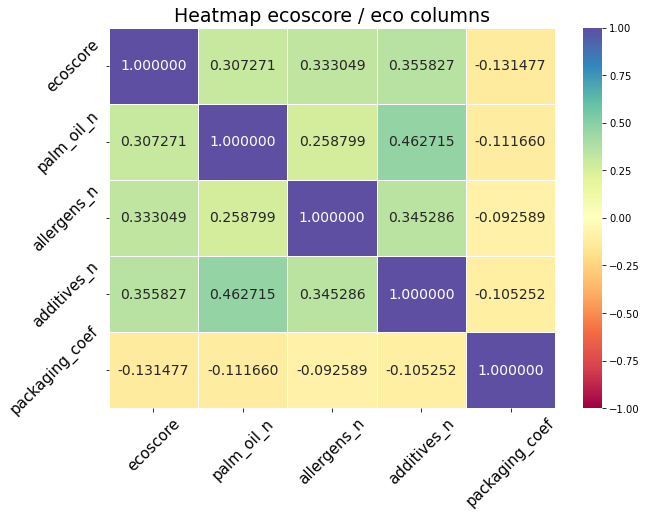

In [43]:
df_nut=df_filter[['ecoscore',
       'palm_oil_n', 'allergens_n', 'additives_n',
       'is_label_bio', 'packaging_coef']]

df_nut["ecoscore"] = df_nut["ecoscore"].map(
                                                    {'a':0,'b':1,'c':2,'d':3,'e':4})


plt.figure(figsize=(10,7))
ax = sns.heatmap(df_nut.corr(),annot=True,
                 vmax=1, vmin=-1, fmt="f",
                 cbar=True,cmap="Spectral",
                 linewidth=1, annot_kws={"size": 14})

ax.set_title('Heatmap ecoscore / eco columns', fontdict = {
                             'fontsize': 19,
                            })
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=45)
plt.sca(ax)
plt.yticks(size=15)
plt.xticks(size=15)
plt.show()

/var/folders/p0/r9j8yslx4_18sgx9jxyw5fmm0000gn/T/ipykernel_892/502888610.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nut["nutrition_grade_fr"] = df_nut["nutrition_grade_fr"].map(
/var/folders/p0/r9j8yslx4_18sgx9jxyw5fmm0000gn/T/ipykernel_892/502888610.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nut["ecoscore"] = df_nut["ecoscore"].map(


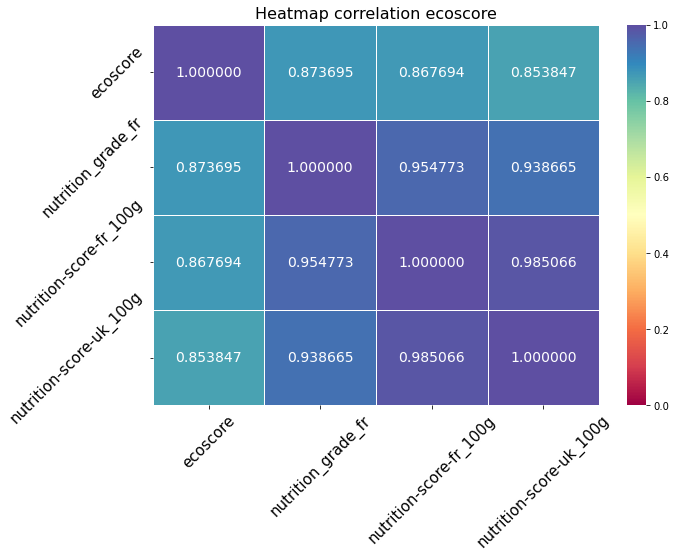

In [44]:
df_nut=df_filter[["ecoscore", 'nutrition_grade_fr', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g']]

df_nut["nutrition_grade_fr"] = df_nut["nutrition_grade_fr"].map(
                                                    {'a':0,'b':1,'c':2,'d':3,'e':4})
df_nut["ecoscore"] = df_nut["ecoscore"].map(
                                                    {'a':0,'b':1,'c':2,'d':3,'e':4})
plt.figure(figsize=(10,7))
ax = sns.heatmap(df_nut.corr(),annot=True,
                 vmax=1, vmin=0, fmt="f",
                 cbar=True,cmap="Spectral",
                 linewidth=1, annot_kws={"size": 14})

ax.set_title('Heatmap correlation ecoscore', fontdict = {
                             'fontsize': 16,
                            })
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=45)


plt.sca(ax)
plt.yticks(size=15)
plt.xticks(size=15)
plt.show()